# NEW HOTS 02 - Testing HOTS on the N-MNIST dataset

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import pickle
from mix_Network import *

## 1. Testing HOTS on N-MNIST with Lagorce 2017 methodology

- loading 15 random digits instead of 3 cycles with 5 digits for learning clusters

In [4]:
hots = network(krnlinit='first', tau=1)
loader = hots.learning1by1()

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 15/15 [02:14<00:00,  8.97s/it]


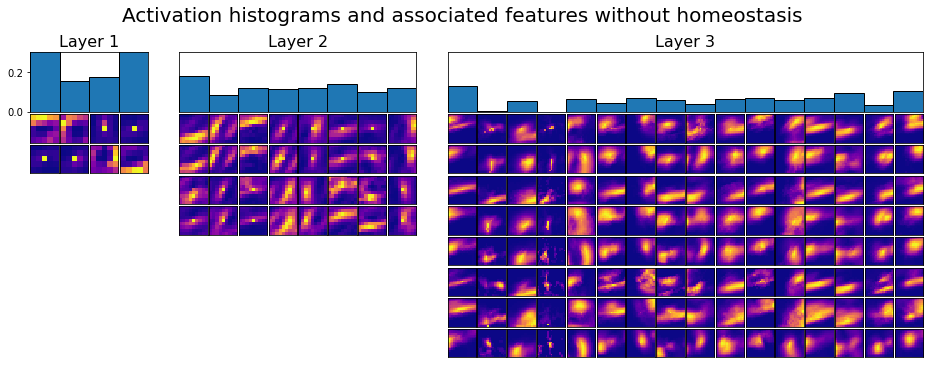

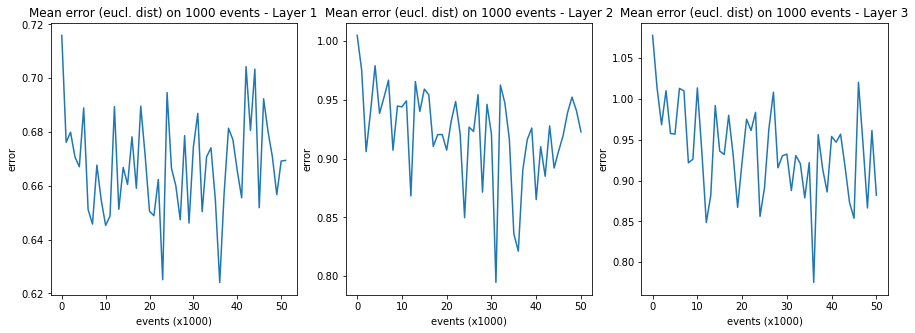

In [5]:
hots.plotlayer()
hots.plotconv()

In [6]:
trainmap, loader = hots.training(loader)
testmap, loader = hots.testing(loader, trainmap)

100%|██████████| 40/40 [05:23<00:00,  8.10s/it]


bhatta:50.0% - eucli:52.5% - norm:52.5%


## 1.2 Random initialisation of the kernels

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 15/15 [02:52<00:00, 11.53s/it]


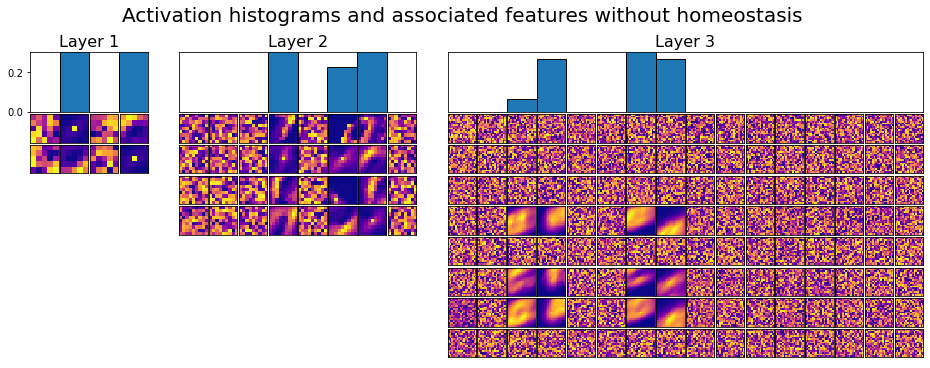

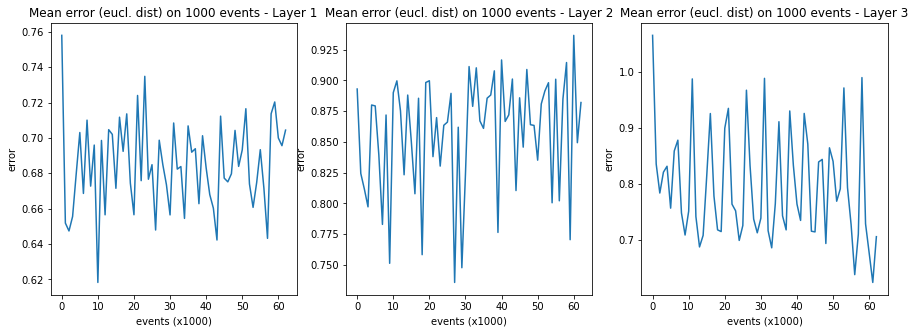

In [7]:
hots = network(krnlinit='rdn', tau=1)
loader = hots.learning1by1()
hots.plotlayer()
hots.plotconv()

In [8]:
trainmap, loader = hots.training(loader)
testmap, loader = hots.testing(loader, trainmap)

100%|██████████| 40/40 [05:48<00:00,  8.70s/it]


bhatta:27.500000000000004% - eucli:27.500000000000004% - norm:27.500000000000004%


## 1.3 Adding Homeostasis

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 15/15 [02:58<00:00, 11.91s/it]


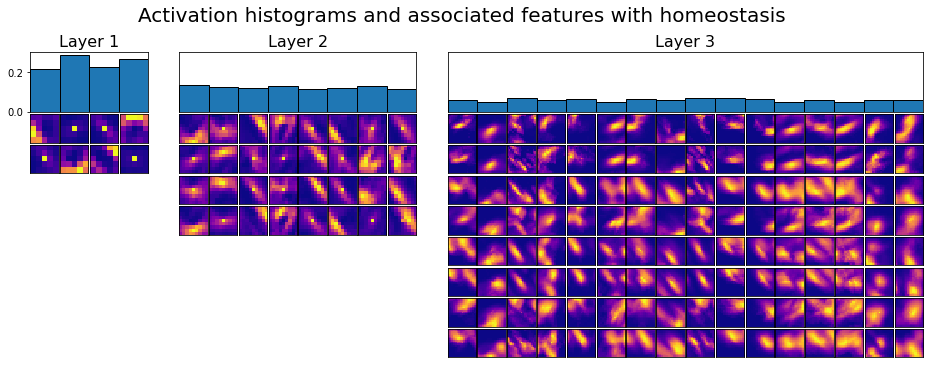

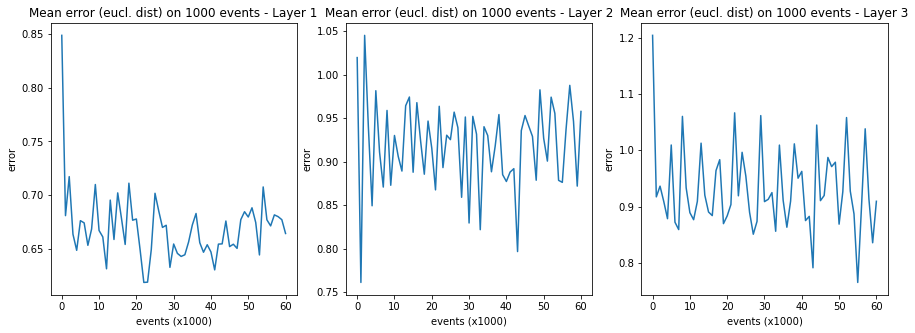

In [9]:
homhots = network(krnlinit='rdn', tau=1, homeo=True)
loaderhom = homhots.learning1by1()
homhots.plotlayer()
homhots.plotconv()

In [10]:
trainmaphom, loaderhom = homhots.training(loaderhom)
testmaphom, loaderhom = homhots.testing(loaderhom, trainmaphom)

100%|██████████| 40/40 [06:41<00:00, 10.04s/it]


bhatta:60.0% - eucli:62.5% - norm:62.5%


### 1.3.1 Classification without homeostasis

In [11]:
for i in range(len(homhots.L)):
    homhots.L[i].homeo=False
trainmaphom2, loaderhom = homhots.training(loaderhom)
testmaphom2, loaderhom = homhots.testing(loaderhom, trainmaphom2)

100%|██████████| 40/40 [05:16<00:00,  7.90s/it]


bhatta:47.5% - eucli:50.0% - norm:55.00000000000001%


### 1.4 Homeostasis and intialisation with the first TS

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 15/15 [02:13<00:00,  8.89s/it]


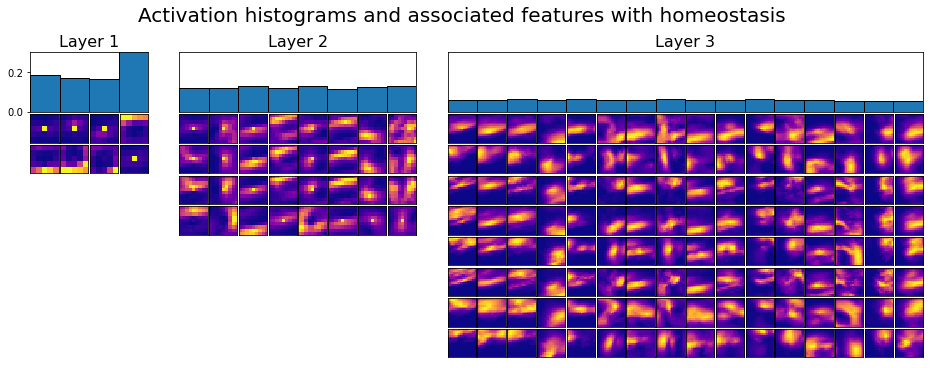

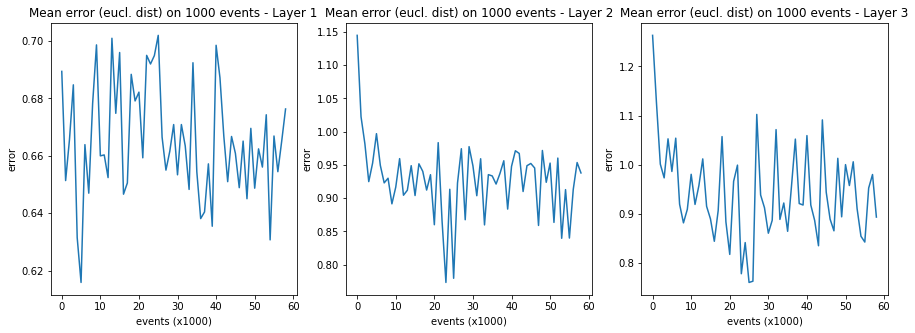

In [12]:
homhots = network(krnlinit='first', tau=1, homeo=True)
loaderhom = homhots.learning1by1()
homhots.plotlayer()
homhots.plotconv()

In [13]:
trainmaphom, loaderhom = homhots.training(loaderhom)
testmaphom, loaderhom = homhots.testing(loaderhom, trainmaphom)

100%|██████████| 40/40 [04:58<00:00,  7.46s/it]


bhatta:72.5% - eucli:75.0% - norm:75.0%


In [14]:
for i in range(len(homhots.L)):
    homhots.L[i].homeo=False
trainmaphom, loader = homhots.training(loader)
testmaphom, loader = homhots.testing(loader, trainmaphom)

100%|██████████| 40/40 [11:16<00:00, 16.92s/it]


bhatta:37.5% - eucli:40.0% - norm:45.0%
